<img src="https://www.th-koeln.de/img/logo.svg" style="float: right;" width="200">

# 1st exercise: <font color="#C70039">Getting Started with Tensors</font>
* Course: DIS21a.1

* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Date:   02.11.2022

<img src="https://www.kdnuggets.com/wp-content/uploads/scalar-vector-matrix-tensor.jpg" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation (for instance, after you have run through your test plan) you may use German language.
This applies to all exercises in DIS 21a.1.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for getting into tensors, as the most important mathematical concept in machine learning, as well as operations for and with tensors. This includes point-wise operations as well as slicing and reshaping. Besides, you will improve your python coding skills.

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook before submitting it.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab.
    * of course you may use your local machine, too.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time. 
4. take a random function in python and create the following: (the number of elements is up to you [except for the 0D tensor of course :-)]).
    * 0D tensor
    * 1D tensor
    * 2D tensor
    * 3D tensor
5. print out the rank and the shape. 
6. visualize a batch of 20 images from the MNIST data set (randomly chosen).
7. shift a window of 15x15 pixels through one of these images (starting in the uper left corner) and visualize it.
    * shift the 15x15 window always one pixel to the right until you get to the end of the image and then move down. Visualize every image after the shift. 
8. reshape one image to 56x14 and visualize it again 
    * Describe what happened to the tensor entries!!!
9. How would the image look alike when your reshape it to (784,1)?
-----------------------------------------------------------------------------------

_________________________________________________________
### This sections deals with tensor basics
_________________________________________________________

In [1]:
# this is a scalar or a 0D tensor (zero-dim tensor)
# a 0D tensor is a tensor of rank 0
import numpy as np
scalar = np.array(13)
scalar

array(13)

In [2]:
print('A scalar is of rank %d' %(scalar.ndim)) # ndim delivers the rank of a tensor

A scalar is of rank 0


the rank of a tensor is also often referred to as the axis of the tensor. Hence the axis of a scalar, a 0D-tensor is zero

```
# formatted as code
```



In [3]:
# this is a vector or a 1D tensor 
# a 1D tensor is a tensor of rank 1 with 1 axis.
vector = np.array([11,12,13,14,15])
vector


array([11, 12, 13, 14, 15])

In [4]:
print('A vector is of rank %d' %(vector.ndim)) # ndim delivers the rank of a tensor

A vector is of rank 1


In [5]:
# this is a matrix or a 2D tensor 
# a 2D tensor is a tensor of rank 2 with 2 axes.
mat = np.array([[1,2,3,4,5],
               [11,12,13,14,15],
               [21,22,23,24,25]])
mat

array([[ 1,  2,  3,  4,  5],
       [11, 12, 13, 14, 15],
       [21, 22, 23, 24, 25]])

In [6]:
print('A matrix is of rank %d' %(mat.ndim)) # ndim delivers the rank of a tensor

A matrix is of rank 2


the entries from the first axis are the "rows"
the entris from the second axis are the "columns"

In [6]:
# this is a slightly bigger matrix
mat2 = np.array([[1,2,3,4,5],
               [11,12,13,14,15],
               [21,22,23,24,25],
               [31,32,33,34,35],
               [41,42,43,44,45]])

print('This matrix is of rank %d, too' %(mat2.ndim)) # rank or axes refer to rows and columns

This matrix is of rank 2, too


In [7]:
# this is a cube or a 3D tensor 
# a 3D tensor is a tensor of rank 3 with 3 axes.
cube = np.array([[[1,2,3,4,5],
               [11,12,13,14,15],
               [21,22,23,24,25]], #the first axis
               [[6,7,8,9,10],
               [16,17,18,19,20],
               [26,27,28,29,30]], # the second axis
               [[100,200,300,400,500],
               [110,120,130,140,150],
               [2121,2221,2321,2421,2521]]]) # the third axis
cube

array([[[   1,    2,    3,    4,    5],
        [  11,   12,   13,   14,   15],
        [  21,   22,   23,   24,   25]],

       [[   6,    7,    8,    9,   10],
        [  16,   17,   18,   19,   20],
        [  26,   27,   28,   29,   30]],

       [[ 100,  200,  300,  400,  500],
        [ 110,  120,  130,  140,  150],
        [2121, 2221, 2321, 2421, 2521]]])

In [9]:
print('This cube is of rank %d' %(cube.ndim)) # rank or axes refer to rows and columns and depth

This cube is of rank 3


In [10]:
# shape of scalar
scalar.shape

()

In [11]:
# shape of vector
vector.shape

(5,)

In [12]:
# so what is the difference between mat and mat2??
# -> it is the shape of the matrices
# the 'shape' delivers how  many dimensions the tensor has got along each axis
print('The shape of matrix mat is ')
mat.shape

The shape of matrix mat is 


(3, 5)

In [13]:
print('The shape of matrix mat2 is ')
mat2.shape

The shape of matrix mat2 is 


(5, 5)

In [14]:
# shape of cube
cube.shape

(3, 3, 5)

_________________________________________________________
### This sections deals with more complex shapes and tensors
_________________________________________________________

In [8]:
#imports
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# load data set, that is split already into a training and testing set
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [10]:
print(train_images.shape)
print(train_images.dtype)
print(train_images.ndim)

(10000, 28, 28)
uint8
3


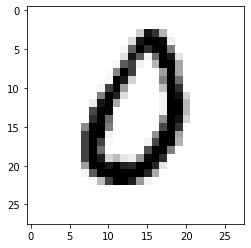

In [17]:
trainimage_picked = train_images[666] # pick image at index 666 from the training data set
plt.imshow(trainimage_picked, cmap=plt.cm.binary)
plt.show()

______________________________________________________________
Sometimes is it useful just to take parts/slices of data sets. Here is how to slice tensors. 
We just take a slice (often denoted as a batch) of 90 images,
from index 10 to 99. **NOTE** that all three ways of slicing result
in the same.
______________________________________________________________

In [18]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [19]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [20]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [21]:
# also parts of images can be extracted by slicing the other axes of the tensor
my_slice = train_images[10:100, 14:, 14:] # this takes the bottom-right corner of each of the 90 images
print(my_slice.shape)

(90, 14, 14)


In [22]:
# by using a negative index, you slice out the center piece.
my_slice = train_images[10:100, 7:-7, 7:-7]
print(my_slice.shape)

(90, 14, 14)


_________________________________________________________
### This sections deals with reshaping of tensors
_________________________________________________________

In [23]:
my_tensor = np.array([[0., 1.], [20., 30.], [400., 500.]])
print("The shape of my_tensor is:", my_tensor.shape)
my_tensor

The shape of my_tensor is: (3, 2)


array([[  0.,   1.],
       [ 20.,  30.],
       [400., 500.]])

In [24]:
my_tensor=my_tensor.reshape((6,1))
print("The shape of my_tensor is:", my_tensor.shape)
my_tensor

The shape of my_tensor is: (6, 1)


array([[  0.],
       [  1.],
       [ 20.],
       [ 30.],
       [400.],
       [500.]])

In [25]:
my_tensor=my_tensor.reshape((2,3))
print("The shape of my_tensor is:", my_tensor.shape)
my_tensor

The shape of my_tensor is: (2, 3)


array([[  0.,   1.,  20.],
       [ 30., 400., 500.]])

In [26]:
print("Shape of train_images after loading", train_images.shape)
print("rank=",train_images.ndim)


Shape of train_images after loading (60000, 28, 28)
rank= 3


In [27]:
train_images = train_images.reshape((60000,28*28))
print("Shape of train_images after reshaping", train_images.shape)


Shape of train_images after reshaping (60000, 784)


--------------------------
### <font color="#C70039">here starts your own coding section</font>